In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as  sns
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:

# feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

# import linear model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# model evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2

In [5]:
df=pd.read_csv("Train.csv") 

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Visualisation

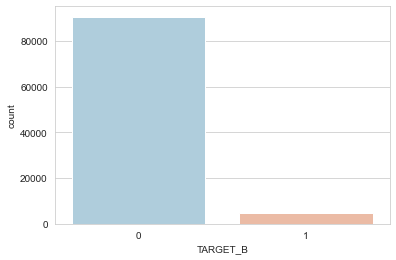

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [6]:
### dependent variable distribution
sns.set_style('whitegrid')
sns.countplot(x='TARGET_B',data=df,palette='RdBu_r')
plt.show()

df['TARGET_B'].value_counts()

Current size: [6.0, 4.0]


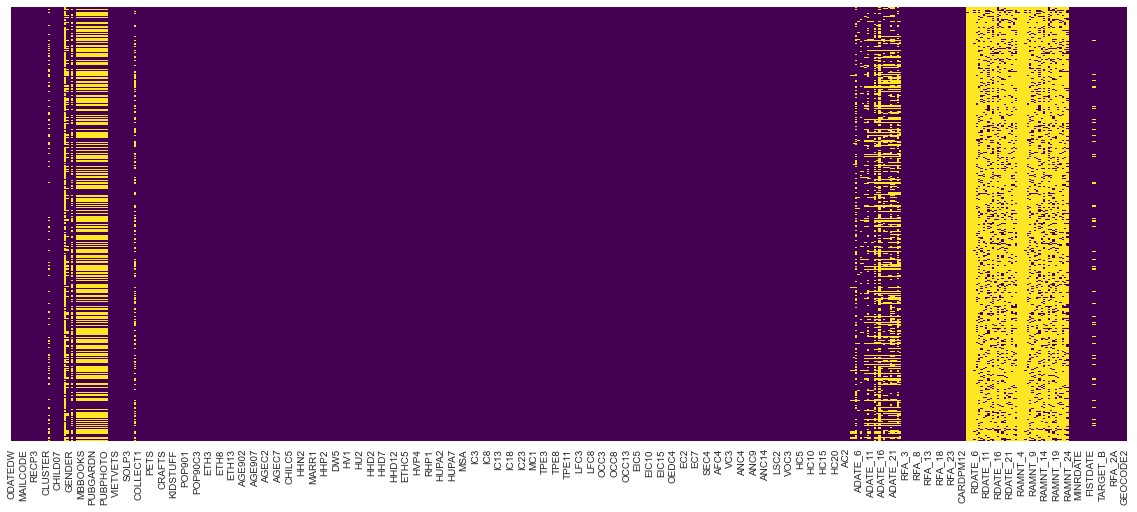

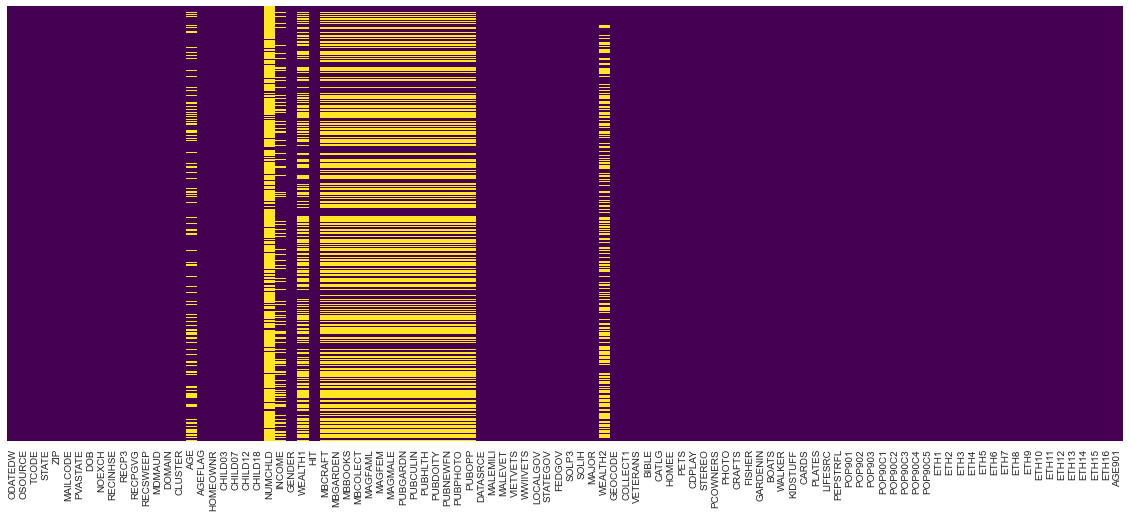

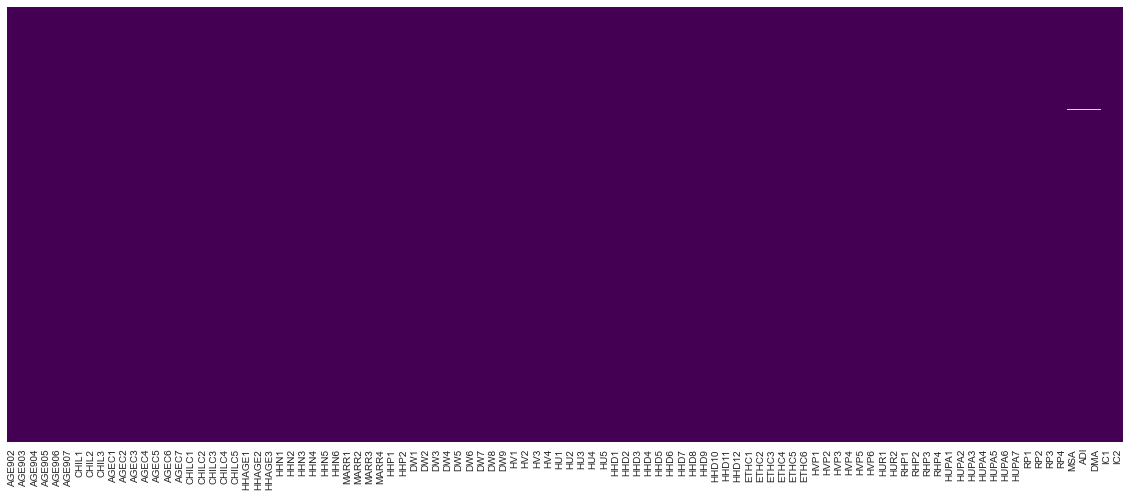

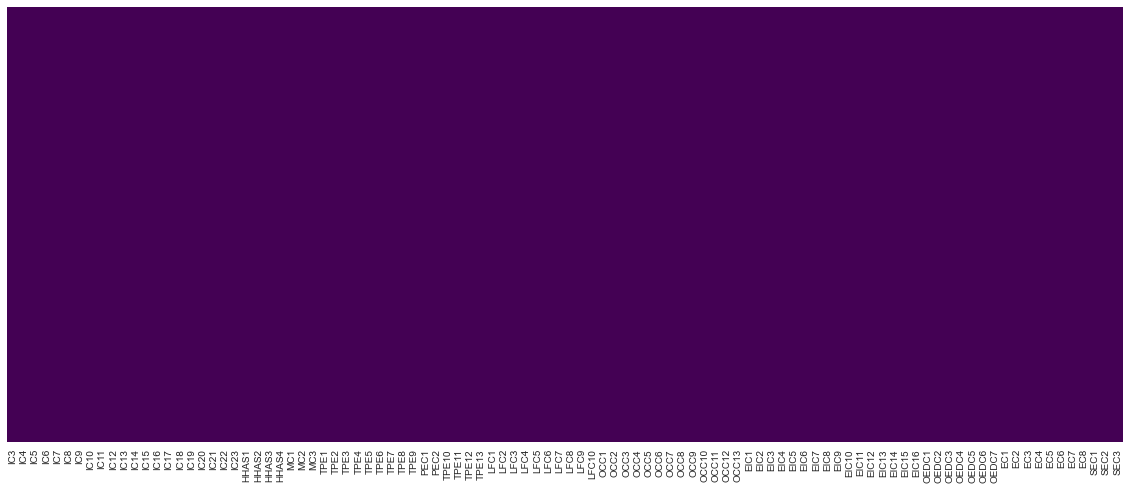

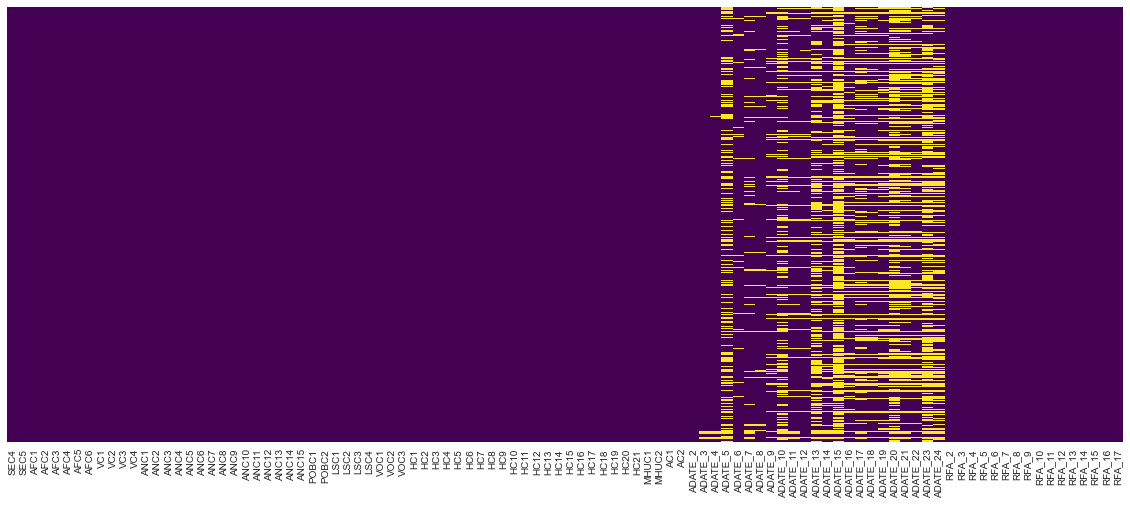

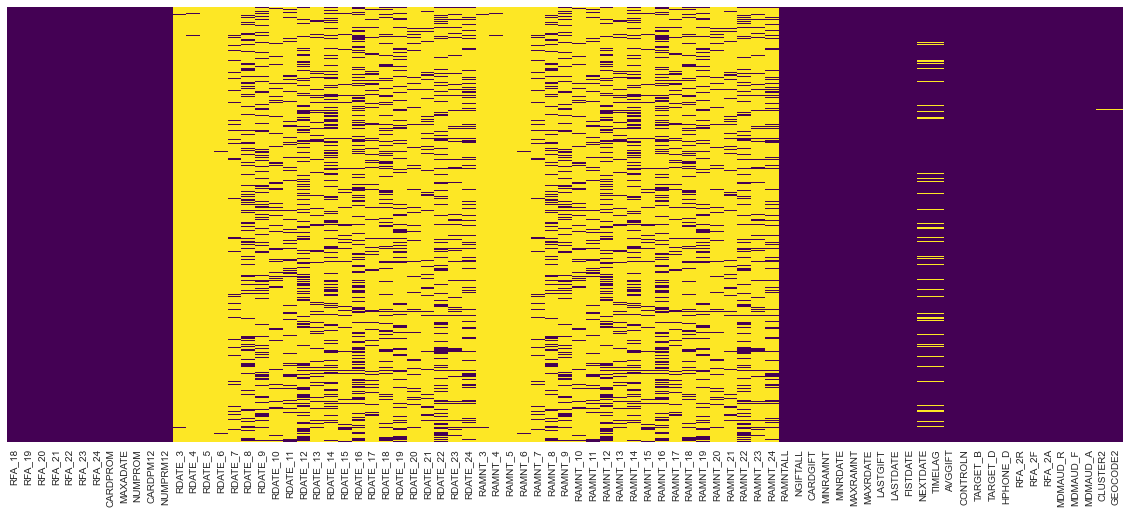

NameError: name 'data' is not defined

In [7]:
###  missing values visualisation

### Get size
fig_size = plt.rcParams["figure.figsize"]
print('Current size:', fig_size)
 
### Set  width and height
fig_width = 20 # width
fig_height = 8 # height
plt.rcParams["figure.figsize"] = [fig_width, fig_height]

### check  values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

sns.heatmap(df[df.columns[0:100]].isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

sns.heatmap(df[df.columns[100:200]].isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

sns.heatmap(df[df.columns[200:300]].isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

sns.heatmap(df[df.columns[300:400]].isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

sns.heatmap(df[df.columns[400:482]].isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

data.describe(include='all')

### Preprocessing

In [ ]:
#Drop Id columns
df.drop(columns=['CONTROLN'], inplace=True)

In [ ]:
df['INCOME'].isna().sum()

In [ ]:
df['NUMCHLD'].value_counts()

In [ ]:
#MUMAD - The Major Donor Matrix code
#The codes describe frequency and amount of
#giving for donors who have given a $100+
#gift at any time in their giving history.

In [ ]:
#MUMAD convertion - split to few columns
col_name='MDMAUD'
leng=4
missin_val='XXXX'

def muman_conv(col_name,leng,missin_val):
    col_name='MDMAUD'
    if (col_name in df.columns):
        for i in range(df.shape[0]):
#         for i in range(0,10):
            col_data=str(df[col_name][i])
            splited_data=list(col_data)
#             print(splited_data)
#             print('aaa: ', col_data, ' ', col_data != 'XXXX')
            if (len(col_data) == leng) and ( col_data != missin_val):
#                 print(len(col_data))
                for leter_counter in range(leng):
                    print(leter_counter)
                    if col_data[leter_counter].isdigit():
                        df.at[i, col_name+'_' +str(leter_counter)]=float(col_data[leter_counter])
                    else:
                        df.at[i, col_name+'_' +str(leter_counter)]=col_data[leter_counter]                    

In [ ]:
muman_conv(col_name,leng,missin_val)


In [ ]:
#domain - Urbanicity level and Socio-Economic status of the neighborhood
# DOMAIN convertion - split to few columns
col_name='DOMAIN'
leng=2
missin_val=''

def string_conv(col_name,leng,missin_val):
    col_name='DOMAIN'
    if (col_name in df.columns):
        for i in range(df.shape[0]):
#         for i in range(0,10):
            col_data=str(df[col_name][i])
            splited_data=list(col_data)
#             print(splited_data)
#             print('aaa: ', col_data, ' ', col_data != 'XXXX')
            if (len(col_data) == leng) and ( col_data != missin_val):
#                 print(len(col_data))
                for leter_counter in range(leng):
                    print(leter_counter)
                    if col_data[leter_counter].isdigit():
                        df.at[i, col_name+'_' +str(leter_counter)]=float(col_data[leter_counter])
                    else:
                        df.at[i, col_name+'_' +str(leter_counter)]=col_data[leter_counter]  

In [ ]:
df_copy=df.copy()

In [ ]:
string_conv(col_name,leng,missin_val)

In [ ]:
df

In [17]:
# Fill 'AGE' less 18 to nan
df.loc[(df.AGE < 18),'AGE']=np.nan

In [18]:
# drop original columns 'MDMAUD','DOMAIN' and  'AGEFLAG'
df.drop(columns=['MDMAUD','DOMAIN','AGEFLAG'], inplace=True)

In [24]:
# Convert 'HOMEOWNR' from string to float64 and fill missing with NaN
df.HOMEOWNR = df['HOMEOWNR'].replace(r'\s+', np.nan, regex=True)
df.HOMEOWNR = df['HOMEOWNR'].replace('H', 1)
df.HOMEOWNR = df['HOMEOWNR'].replace('U', 0)

In [27]:
# Convert 'GENDER' from string to float64 and fill missing with NaN
df['GENDER'].replace('M',1,inplace=True)
df['GENDER'].replace('F',0,inplace=True)
df['GENDER'].replace(r'[AUJC\s]+',np.nan,regex=True,inplace=True)
#gender missing calculate from #TCODE
for row in df.index[df['GENDER'].isnull()].tolist():
    a = df.loc[row,'TCODE']
    if a == 0 or a == 1:
      df.loc[row,'GENDER'] = 1
    elif a == 2 or a == 3 or a == 28:
      df.loc[row,'GENDER'] = 0

In [ ]:
#Other categorials converting and and fill missing

In [30]:
df.SOLIH = df['SOLIH'].replace(r'\s+', np.nan, regex=True)

In [32]:
df.MAJOR = df['MAJOR'].replace(r'\s+', 0, regex=True)
df.MAJOR = df['MAJOR'].replace('X', 1)

In [33]:
df.GEOCODE = df['GEOCODE'].replace(r'\s+', 0, regex=True)
df.GEOCODE = df['GEOCODE'].replace('X', 1)

In [34]:
df[['COLLECT1','VETERANS','BIBLE','CATLG','HOMEE','PETS','CDPLAY']] = df[['COLLECT1','VETERANS','BIBLE','CATLG','HOMEE','PETS','CDPLAY']].replace(r'\s+',0,regex=True)
df[['COLLECT1','VETERANS','BIBLE','CATLG','HOMEE','PETS','CDPLAY']] = df[['COLLECT1','VETERANS','BIBLE','CATLG','HOMEE','PETS','CDPLAY']].replace('Y',1,regex=True)

In [35]:
df[['STEREO','PCOWNERS','PHOTO','CRAFTS','FISHER']] = df[['STEREO','PCOWNERS','PHOTO','CRAFTS','FISHER']].replace(r'\s+',0,regex=True)
df[['STEREO','PCOWNERS','PHOTO','CRAFTS','FISHER']] = df[['STEREO','PCOWNERS','PHOTO','CRAFTS','FISHER']].replace('Y',1,regex=True)

In [36]:
df[['BOATS','WALKER','KIDSTUFF','CARDS','PLATES']]=  df[['BOATS','WALKER','KIDSTUFF','CARDS','PLATES']].replace(r'\s+',0,regex=True)
df[['BOATS','WALKER','KIDSTUFF','CARDS','PLATES']] = df[['BOATS','WALKER','KIDSTUFF','CARDS','PLATES']].replace('Y',1,regex=True)

In [42]:
df[['PEPSTRFL']]=  df[['PEPSTRFL']].replace(r'\s+',0,regex=True)
df[['BOATS','WALKER','KIDSTUFF','CARDS','PLATES']] = df[['BOATS','WALKER','KIDSTUFF','CARDS','PLATES']].replace('Y',1,regex=True)

In [ ]:
df['LIFESRC'].value_counts()

In [ ]:
#drop 'LIFESRC' too many missing data
df.drop(columns=['LIFESRC'], inplace=True) 

In [44]:
df_t1= df.iloc[:,320:360].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 40 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ANC13    95412 non-null  int64  
 1   ANC14    95412 non-null  int64  
 2   ANC15    95412 non-null  int64  
 3   POBC1    95412 non-null  int64  
 4   POBC2    95412 non-null  int64  
 5   LSC1     95412 non-null  int64  
 6   LSC2     95412 non-null  int64  
 7   LSC3     95412 non-null  int64  
 8   LSC4     95412 non-null  int64  
 9   VOC1     95412 non-null  int64  
 10  VOC2     95412 non-null  int64  
 11  VOC3     95412 non-null  int64  
 12  HC1      95412 non-null  int64  
 13  HC2      95412 non-null  int64  
 14  HC3      95412 non-null  int64  
 15  HC4      95412 non-null  int64  
 16  HC5      95412 non-null  int64  
 17  HC6      95412 non-null  int64  
 18  HC7      95412 non-null  int64  
 19  HC8      95412 non-null  int64  
 20  HC9      95412 non-null  int64  
 21  HC10     954

In [45]:
df_copy=df.copy()

In [46]:
df.to_csv('df_prep_steap1.csv')

In [ ]:
#ADATE_ - dates promotion was mailed
#RDATE_ - dates the gift was received 
#Calculate month between

In [47]:
for name_index in range(2,25):

    name_a_date='ADATE_'+ str(name_index)
    name_r_date='RDATE_'+ str(name_index)
    if (name_a_date in df.columns) and (name_r_date in df.columns):
        for i in range(df.shape[0]):
#         for i in range(1,3):
            item_a1=df[name_a_date][i]
            item_r1=df[name_r_date][i]      
            item_a1_y=np.around(item_a1/100) 
            item_r1_y=np.around(item_r1/100) 
            item_a1_m=np.around(item_a1%100) 
            item_r1_m=np.around(item_r1%100)  
            if (not pd.isna(item_a1)) and (not pd.isna(item_r1)):
                res_mont=np.nan
                year_dif=item_r1_y-item_a1_y
                month_dif=np.nan
                if (year_dif == 0 ):
                    res_mont=item_r1_m - item_a1_m
                elif (year_dif > 0):
                    month_dif = item_r1_m - item_a1_m
                    res_mont = (year_dif-1)*12 + (12 + month_dif)             
                if (res_mont<0):
                    res_mont=np.nan
#                     print('res_mont: ', res_mont)
                df.at[i, 'Month_c'+str(name_index)] = res_mont
#                 print('res_mont: ', res_mont)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


In [48]:
print('ok')

ok


In [49]:
df.to_csv('df_prep_steap2.csv')

In [ ]:
#The RFA (recency/frequency/amount) status of the 
#                           donors (as of the promotion dates) is included in the 
#                            RFA fields.
#Donor's RFA status as of  promotions dates
#Converting RFA to 3 separate codes columns

In [50]:
for name_index in range(2,25):
     name_rfa='RFA_'+ str(name_index)
     if (name_rfa in df.columns):
         for i in range(df.shape[0]):
    #         for i in range(0,10):
             rfa_data=str(df[name_rfa][i])
             splited_data=list(rfa_data)
             if len(rfa_data) ==3:
#                  print('splited_data',splited_data)
                 for counter in range(3):
                     if counter == 0:
                         df.at[i, name_rfa+'_0']=rfa_data[counter]
                     if (counter == 1) and (rfa_data[counter].isdigit()):
                         df.at[i, name_rfa+'_1'] = float(rfa_data[counter])
                     if (counter == 2):
                         df.at[i, name_rfa+'_2']=rfa_data[counter]

In [51]:
df_t1= df.iloc[:,456:470].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MINRDATE  95412 non-null  int64  
 1   MAXRAMNT  95412 non-null  float64
 2   MAXRDATE  95412 non-null  int64  
 3   LASTGIFT  95412 non-null  float64
 4   LASTDATE  95412 non-null  int64  
 5   FISTDATE  95412 non-null  int64  
 6   NEXTDATE  85439 non-null  float64
 7   TIMELAG   85439 non-null  float64
 8   AVGGIFT   95412 non-null  float64
 9   TARGET_B  95412 non-null  int64  
 10  TARGET_D  95412 non-null  float64
 11  HPHONE_D  95412 non-null  int64  
 12  RFA_2R    95412 non-null  object 
 13  RFA_2F    95412 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 10.2+ MB


In [52]:
df.to_csv('df_prep_steap3.csv')

In [232]:
## run in case of uploading file
##df.drop(columns=['Unnamed: 0'], inplace=True)

In [53]:
df.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,RFA_21_2,RFA_22_0,RFA_22_1,RFA_22_2,RFA_23_0,RFA_23_1,RFA_23_2,RFA_24_0,RFA_24_1,RFA_24_2
0,9001,,1,TX,77096,,,1509,0,,...,G,L,1.0,G,NaN,NaN,NaN,A,1.0,G
1,9001,,0,CA,91320,,,2609,0,,...,F,A,1.0,F,A,1.0,F,A,1.0,F
2,9001,,1,KY,42701,,,5805,0,,...,F,A,1.0,F,A,1.0,F,L,3.0,F
3,8901,,0,IN,47240,B,,1001,0,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,3.0,E
4,8701,ASC,0,MN,55102,B,,0,0,,...,NaN,A,1.0,D,A,4.0,E,L,4.0,E


In [54]:
#'MDMAUD_A' - Donation Amount code for MDMAUD 
print(df['MDMAUD_A'].isna().sum())
print(df['MDMAUD_A'].value_counts())

0
X    95118
C      249
L       23
M       17
T        5
Name: MDMAUD_A, dtype: int64


In [56]:
#['RFA_2R'] Recency code for RFA_2
df['RFA_2R'].value_counts()

L    95412
Name: RFA_2R, dtype: int64

In [57]:
df['RFA_2R']

0        L
1        L
2        L
3        L
4        L
        ..
95407    L
95408    L
95409    L
95410    L
95411    L
Name: RFA_2R, Length: 95412, dtype: object

In [221]:
#drop ['RFA_2R']
df.drop(columns=['RFA_2R'], inplace=True)

In [59]:
#'RFA_2F' Frequency code for RFA_2
print(df['RFA_2F'].isna().sum())
print(df['RFA_2F'].value_counts())

0
1    47675
2    20545
3    15291
4    11901
Name: RFA_2F, dtype: int64


In [214]:
#if problem ocured
#df.RFA_2F = df_copy.copy().RFA_2F

### GET TEARGETS

In [60]:
df_copy=pd.read_csv("Train.csv") 

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
y=df_copy[['TARGET_D','TARGET_B']]

In [62]:
y_d=y['TARGET_D']

In [63]:
y_b=y['TARGET_B']

### ENCODING CATEGORIAL

In [64]:
# to one_hot(['CHILD03','CHILD07','CHILD12','CHILD18','DATASRCE','MAXADATE','RFA_2A','MDMAUD_R','MDMAUD_F','MDMAUD_A'])
col_to_one_hot = ['CHILD03','CHILD07','CHILD12','CHILD18','DATASRCE','MAXADATE','RFA_2A','MDMAUD_R','MDMAUD_F','MDMAUD_A']

In [65]:

#select  obj columns
df_col_obj=df.select_dtypes(['object'])
print('number of string column:',len(df_col_obj.columns))

#trim data
df[df_col_obj.columns] = df_col_obj.apply(lambda x: x.str.strip())



number of string column: 100


In [66]:
col_to_label = [col for col in df_col_obj.columns if col not in col_to_one_hot]

In [67]:
df_col_label=df[col_to_label]

In [68]:
print('number of column to label encoder:',len(df_col_label.columns))

number of column to label encoder: 91


In [69]:
# label encoder
for col_name in df_col_label.columns:
    label_encoder = preprocessing.LabelEncoder()
    #  missing value 
    df[col_name][df[col_name].isnull()] = 'NaN' 
    label_encoder.fit(df[col_name])
    df[col_name]=label_encoder.transform(df[col_name]) 

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [70]:
df.to_csv('df_prep_steap4.csv')

In [71]:
df

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,RFA_21_2,RFA_22_0,RFA_22_1,RFA_22_2,RFA_23_0,RFA_23_1,RFA_23_2,RFA_24_0,RFA_24_1,RFA_24_2
0,9001,0,1,48,14014,0,0,1509,1,0,...,6,3,1.0,6,5,NaN,6,0,1.0,6
1,9001,0,0,8,16843,0,0,2609,1,0,...,5,0,1.0,5,0,1.0,4,0,1.0,5
2,9001,0,1,22,5474,0,0,5805,1,0,...,5,0,1.0,5,0,1.0,4,3,3.0,5
3,8901,0,0,20,5994,1,0,1001,1,0,...,7,5,NaN,7,5,NaN,6,3,3.0,4
4,8701,75,0,28,8401,1,0,0,1,0,...,7,0,1.0,3,0,4.0,3,3,4.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,60,0,42,19166,0,0,0,3,0,...,7,5,NaN,7,5,NaN,6,5,NaN,7
95408,8609,575,58002,13,2707,0,0,1901,3,1,...,6,7,3.0,6,6,4.0,5,7,4.0,6
95409,9401,71,1,53,19543,1,0,0,3,0,...,3,4,2.0,3,5,NaN,6,5,NaN,7
95410,8801,486,1,8,18507,0,0,1311,3,0,...,7,5,NaN,7,0,3.0,5,0,3.0,6


In [72]:
### TO ONE HOT

col_to_one_hot

['CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'DATASRCE',
 'MAXADATE',
 'RFA_2A',
 'MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_A']

In [73]:
df[col_to_one_hot]

,CHILD03,CHILD07,CHILD12,CHILD18,DATASRCE,MAXADATE,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A
0,,,,,3,9702,F,X,X,X
1,,,,,3,9702,F,X,X,X
2,,,,,3,9702,F,X,X,X
3,,,,,2,9702,F,X,X,X
4,,,,,3,9702,E,X,X,X
...,...,...,...,...,...,...,...,...,...,...
95407,,,,,3,9702,F,X,X,X
95408,,,,,3,9702,G,X,X,X
95409,,,,,2,9702,D,X,X,X
95410,,,,,3,9702,G,X,X,X


In [74]:
for col in col_to_one_hot:
    df[col] = pd.Categorical(df[col])
    dfDummies = pd.get_dummies(df[col], prefix = col)
    df = pd.concat([df, dfDummies], axis=1)
    

In [75]:
df.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,MDMAUD_R_X,MDMAUD_F_1,MDMAUD_F_2,MDMAUD_F_5,MDMAUD_F_X,MDMAUD_A_C,MDMAUD_A_L,MDMAUD_A_M,MDMAUD_A_T,MDMAUD_A_X
0,9001,0,1,48,14014,0,0,1509,1,0,...,1,0,0,0,1,0,0,0,0,1
1,9001,0,0,8,16843,0,0,2609,1,0,...,1,0,0,0,1,0,0,0,0,1
2,9001,0,1,22,5474,0,0,5805,1,0,...,1,0,0,0,1,0,0,0,0,1
3,8901,0,0,20,5994,1,0,1001,1,0,...,1,0,0,0,1,0,0,0,0,1
4,8701,75,0,28,8401,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1


In [76]:
df.drop(columns=col_to_one_hot, inplace=True)

In [77]:
df.to_csv('df_prep_steap5.csv')

In [23]:
# df=pd.read_csv("final_18-02-v5.csv") 

In [24]:
# df.drop(columns='Unnamed: 0', inplace=True)

In [78]:
df.columns.to_series().groupby(df.dtypes).count()

uint8       43
int32       91
int64      326
float64    146
dtype: int64

In [79]:
df.isna().sum().values.sum()

7640752

### DATA IMPUTATION

In [80]:
df.fillna(0,axis=1,inplace=True)

In [82]:
df.columns.to_series().groupby(df.dtypes).count()

uint8       43
int32       91
int64      326
float64    146
dtype: int64

In [83]:
df.drop(columns=['TARGET_D','TARGET_B'], inplace=True)

### Feature engineering


In [84]:
binary_cols = []
for col in df.columns:
    if len(df[col].unique()) == 2:
        if np.sum(df[col].unique() == np.array([0,1])) == 2:
            binary_cols.append(col)
binary_cols

['MAILCODE',
 'RECINHSE',
 'RECPGVG',
 'RECSWEEP',
 'MAJOR',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'HPHONE_D',
 'CHILD03_B',
 'CHILD03_F',
 'CHILD03_M',
 'CHILD07_B',
 'CHILD07_F',
 'CHILD07_M',
 'CHILD12_B',
 'CHILD12_F',
 'CHILD12_M',
 'CHILD18_B',
 'CHILD18_F',
 'CHILD18_M',
 'DATASRCE_',
 'DATASRCE_1',
 'DATASRCE_2',
 'MAXADATE_9608',
 'MAXADATE_9611',
 'MAXADATE_9612',
 'MAXADATE_9701',
 'RFA_2A_D',
 'RFA_2A_E',
 'RFA_2A_G',
 'MDMAUD_R_C',
 'MDMAUD_R_D',
 'MDMAUD_R_I',
 'MDMAUD_R_L',
 'MDMAUD_F_1',
 'MDMAUD_F_2',
 'MDMAUD_F_5',
 'MDMAUD_A_C',
 'MDMAUD_A_L',
 'MDMAUD_A_M',
 'MDMAUD_A_T']

In [85]:
non_binary = []
for col in df.columns:
    if col in binary_cols:
        pass
    else:
        non_binary.append(col)

In [86]:
non_binary

['ODATEDW',
 'OSOURCE',
 'TCODE',
 'STATE',
 'ZIP',
 'PVASTATE',
 'DOB',
 'NOEXCH',
 'RECP3',
 'CLUSTER',
 'AGE',
 'HOMEOWNR',
 'NUMCHLD',
 'INCOME',
 'GENDER',
 'WEALTH1',
 'HIT',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'MALEMILI',
 'MALEVET',
 'VIETVETS',
 'WWIIVETS',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'SOLP3',
 'SOLIH',
 'WEALTH2',
 'GEOCODE',
 'CDPLAY',
 'STEREO',
 'WALKER',
 'PEPSTRFL',
 'POP901',
 'POP902',
 'POP903',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'ETH13',
 'ETH14',
 'ETH15',
 'ETH16',
 'AGE901',
 'AGE902',
 'AGE903',
 'AGE904',
 'AGE905',
 'AGE906',
 'AGE907',
 'CHIL1',
 'CHIL2',
 'CHIL3',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'CHILC1',
 'CHILC2',
 'CHILC3',
 'CHILC4',
 'C

In [87]:
len(non_binary), len(binary_cols)

(550, 54)

In [88]:
'TARGET_B' in binary_cols , 'TARGET_D' in binary_cols

(False, False)

In [89]:
'TARGET_D' in non_binary , 'TARGET_D' in non_binary

(False, False)

# For non binary column:

* 4 binary variables segregated by quartiles.

* log transformation.

* Select best of the 10 corr with target , and drop others.

* Select best of the 10 corr with  log target , and drop others. 

In [90]:
df.isna().sum().values.sum()

0

In [91]:
df

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,MDMAUD_R_X,MDMAUD_F_1,MDMAUD_F_2,MDMAUD_F_5,MDMAUD_F_X,MDMAUD_A_C,MDMAUD_A_L,MDMAUD_A_M,MDMAUD_A_T,MDMAUD_A_X
0,9001,0,1,48,14014,0,0,1509,1,0,...,1,0,0,0,1,0,0,0,0,1
1,9001,0,0,8,16843,0,0,2609,1,0,...,1,0,0,0,1,0,0,0,0,1
2,9001,0,1,22,5474,0,0,5805,1,0,...,1,0,0,0,1,0,0,0,0,1
3,8901,0,0,20,5994,1,0,1001,1,0,...,1,0,0,0,1,0,0,0,0,1
4,8701,75,0,28,8401,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,60,0,42,19166,0,0,0,3,0,...,1,0,0,0,1,0,0,0,0,1
95408,8609,575,58002,13,2707,0,0,1901,3,1,...,1,0,0,0,1,0,0,0,0,1
95409,9401,71,1,53,19543,1,0,0,3,0,...,1,0,0,0,1,0,0,0,0,1
95410,8801,486,1,8,18507,0,0,1311,3,0,...,1,0,0,0,1,0,0,0,0,1


In [92]:
# quartiles
def quartiles_encode(col):
    flag=False
    try:
        temp = pd.qcut(df[col], [0, .25, .5, .75, 1], labels = ['Q_1','Q_2','Q_3','Q_4'])
        temp_dummies = pd.get_dummies(temp)
        temp_dummies.columns = temp_dummies.columns.tolist()  
        flag = True
    except:
        pass
  
    if flag:
        temp_dummies['log'] = np.log(df[col]+1)
        temp_dummies['asis'] = df[col]
    else:
        temp_dummies = pd.DataFrame(index=df.index, columns= ['asis', 'log'])
        temp_dummies['log'] = np.log(df[col]+1)
        temp_dummies['asis'] = df[col]
    return temp_dummies

        


In [93]:
test_dumm_age = quartiles_encode('AGE')
test_dumm_age

,Q_1,Q_2,Q_3,Q_4,log,asis
0,0,0,0,1,4.418841,82.0
1,0,0,1,0,4.276666,71.0
2,0,1,0,0,3.713572,40.0
3,0,0,0,1,4.488636,88.0
4,1,0,0,0,0.000000,0.0
...,...,...,...,...,...,...
95407,1,0,0,0,0.000000,0.0
95408,0,0,0,1,4.382027,79.0
95409,1,0,0,0,0.000000,0.0
95410,0,0,0,1,4.442651,84.0


In [94]:
def check_features(Y,features):
    X_train, X_test, Y_train, Y_test = train_test_split(features, Y, test_size=0.5, random_state=42)
    selector = SelectKBest(f_regression, k = 1)
    selector.fit(X_train, Y_train)
    
    pval = pd.Series(selector.pvalues_)
    ind = pval.sort_values().head(1).index
    best_feat = features.columns[ind]
    
    return best_feat

In [95]:
check_features(y_d,test_dumm_age)

Index(['Q_1'], dtype='object')

In [96]:
#  highly corr features (>0.7)
corr_features = []

for i in range(len(df.columns)-1):
    feature_first = df.columns[i]
    for j in range(i+1,len(df.columns)):
        feature_second = df.columns[j]
        cur_corr = df[feature_first].corr(df[feature_second])
        if cur_corr >=0.7 or cur_corr <= -0.7:
            corr_features.append(feature_second)

In [97]:
corr_features

['CARDPROM',
 'NUMPROM',
 'NGIFTALL',
 'CARDGIFT',
 'MINRDATE',
 'FISTDATE',
 'DMA',
 'RECSWEEP',
 'DATASRCE_',
 'PUBHLTH',
 'AFC1',
 'AFC2',
 'AFC5',
 'VC1',
 'VC3',
 'OEDC1',
 'OEDC2',
 'OEDC3',
 'MDMAUD_0',
 'MDMAUD_1',
 'MDMAUD_2',
 'MDMAUD_3',
 'MDMAUD_R_X',
 'MDMAUD_F_1',
 'MDMAUD_F_X',
 'MDMAUD_A_C',
 'MDMAUD_A_X',
 'POP902',
 'POP903',
 'POP903',
 'POP90C3',
 'HC18',
 'HC19',
 'HC20',
 'AGE905',
 'AGE906',
 'HC20',
 'ETH2',
 'ETHC2',
 'ETHC4',
 'ETHC5',
 'ETHC4',
 'ETHC5',
 'ETHC6',
 'ETH8',
 'LSC3',
 'ETH13',
 'LSC1',
 'LSC2',
 'LSC3',
 'LSC2',
 'AGE902',
 'AGE903',
 'AGE904',
 'AGE905',
 'AGE906',
 'AGEC6',
 'HHAGE1',
 'HHAGE3',
 'ETHC3',
 'HHAS1',
 'AGE903',
 'AGE904',
 'AGE905',
 'AGE906',
 'AGEC6',
 'AGEC7',
 'HHAGE1',
 'HHAGE3',
 'ETHC3',
 'HHAS1',
 'AGE904',
 'AGE905',
 'AGE906',
 'AGEC6',
 'AGEC7',
 'HHAGE1',
 'HHAGE3',
 'ETHC3',
 'HHAS1',
 'AGE905',
 'AGE906',
 'AGEC6',
 'AGEC7',
 'HHAGE1',
 'HHAGE3',
 'ETHC3',
 'HHAS1',
 'AGE906',
 'AGEC6',
 'AGEC7',
 'HHAGE1',
 'HHAG

In [99]:
'TARGET_B' in corr_features, 'TARGET_D' in corr_features

(False, False)

In [101]:
#select the best feature from the pool of engineered ones

# make empty df
df_temp = pd.DataFrame(index=df.index, columns=['non_binary'])

for col in non_binary:
    var = quartiles_encode(col)
    temp = check_features(y_d,var)
    col_name = col + '_' + str(temp)[8:11]
    df_temp[col_name] = var[temp]

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:293: RuntimeWarning: invalid value encountered in sqrt
  n_samples * X_means ** 2)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < 

In [102]:
df_temp.drop('non_binary', axis = 1, inplace = True)
df_temp.head()

,ODATEDW_Q_4,OSOURCE_log,TCODE_log,STATE_Q_1,ZIP_Q_4,PVASTATE_log,DOB_log,NOEXCH_asi,RECP3_asi,CLUSTER_log,...,CHILD03__log,CHILD07__log,CHILD12__asi,CHILD18__asi,DATASRCE_3_asi,MAXADATE_9702_asi,RFA_2A_F_asi,MDMAUD_R_X_asi,MDMAUD_F_X_asi,MDMAUD_A_X_asi
0,0,0.000000,0.693147,0,0,0.0,7.319865,1,1,0.0,...,0.693359,0.693359,1,1,1,1,1,1,1,1
1,0,0.000000,0.000000,1,1,0.0,7.867106,1,1,0.0,...,0.693359,0.693359,1,1,1,1,1,1,1,1
2,0,0.000000,0.693147,0,0,0.0,8.666647,1,1,0.0,...,0.693359,0.693359,1,1,1,1,1,1,1,1
3,0,0.000000,0.000000,0,0,0.0,6.909753,1,1,0.0,...,0.693359,0.693359,1,1,0,1,1,1,1,1
4,0,4.330733,0.000000,0,0,0.0,0.000000,1,1,0.0,...,0.693359,0.693359,1,1,1,1,0,1,1,1


In [104]:
'TARGET_B' in df_temp.columns, 'TARGET_D' in df_temp.columns 

(False, False)

In [105]:
# similar above but use log of target variable
df_log = pd.DataFrame(index=df.index, columns=['non_binary'])
for col in non_binary:
    var = quartiles_encode(col)
    serial_temp=np.log(y_b+1)
    temp = check_features(serial_temp,var)
    col_name = col + '_' + str(temp)[8:11]
    df_log[col_name] = var[temp]

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:293: RuntimeWarning: invalid value encountered in sqrt
  n_samples * X_means ** 2)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < 

In [106]:
df_log.drop('non_binary', axis = 1, inplace = True)
df_log.shape

(95412, 550)

In [111]:
df['MAXADATE_9608']

0        0
1        0
2        0
3        0
4        0
        ..
95407    0
95408    0
95409    0
95410    0
95411    0
Name: MAXADATE_9608, Length: 95412, dtype: uint8

In [107]:
new_df = pd.concat([df_temp, df[binary_cols], pd.DataFrame(y_d)], axis = 1)
new_df.to_csv('df_reg_fe.csv', header = True, index = False)

In [110]:
new_df.columns

Index(['ODATEDW_Q_4', 'OSOURCE_log', 'TCODE_log', 'STATE_Q_1', 'ZIP_Q_4',
       'PVASTATE_log', 'DOB_log', 'NOEXCH_asi', 'RECP3_asi', 'CLUSTER_log',
       ...
       'MDMAUD_R_I', 'MDMAUD_R_L', 'MDMAUD_F_1', 'MDMAUD_F_2', 'MDMAUD_F_5',
       'MDMAUD_A_C', 'MDMAUD_A_L', 'MDMAUD_A_M', 'MDMAUD_A_T', 'TARGET_D'],
      dtype='object', length=605)

In [108]:
new_df

,ODATEDW_Q_4,OSOURCE_log,TCODE_log,STATE_Q_1,ZIP_Q_4,PVASTATE_log,DOB_log,NOEXCH_asi,RECP3_asi,CLUSTER_log,...,MDMAUD_R_I,MDMAUD_R_L,MDMAUD_F_1,MDMAUD_F_2,MDMAUD_F_5,MDMAUD_A_C,MDMAUD_A_L,MDMAUD_A_M,MDMAUD_A_T,TARGET_D
0,0,0.000000,0.693147,0,0,0.0,7.319865,1,1,0.0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0.000000,0.000000,1,1,0.0,7.867106,1,1,0.0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0.000000,0.693147,0,0,0.0,8.666647,1,1,0.0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0.000000,0.000000,0,0,0.0,6.909753,1,1,0.0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,4.330733,0.000000,0,0,0.0,0.000000,1,1,0.0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,4.110874,0.000000,0,1,0.0,0.000000,3,0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
95408,0,6.356108,10.968250,0,0,0.0,7.550661,3,0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
95409,0,4.276666,0.693147,0,1,0.0,0.000000,3,0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
95410,0,6.188264,0.693147,1,1,0.0,7.179308,3,0,0.0,...,0,0,0,0,0,0,0,0,0,0.0


In [109]:

new_df_log = pd.concat([df_log, df[binary_cols], pd.DataFrame(np.log(y_d+1))], axis = 1)


new_df_log.to_csv('df_reg_fe_log.csv', header = True, index = False)